# Исследование

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

## Модель и данные

In [5]:
from torch.utils.data import Dataset
import torch.nn as nn

In [6]:
class PermAppartmentDataset(Dataset):
    def __init__(self, filename):
        super().__init__()
        data = pd.read_csv(filename, sep=';')
        self.y = torch.from_numpy(data.price.values).to(dtype=torch.float32)
        self.x = torch.from_numpy(data.drop('price', axis=1).values).to(dtype=torch.float32)
        self.n = len(self.y)
        del data
    
    def __len__(self):
        return self.n
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [7]:
class BestModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq = nn.Sequential(
            nn.BatchNorm1d(37),
            nn.Linear(37, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    
    def forward(self, x):
        res = self.seq(x)
        return res

In [8]:
train_set = PermAppartmentDataset('../final_train.csv')

In [9]:
model = BestModel()
model.load_state_dict(torch.load('../best_model.pkl'))

<All keys matched successfully>

## Влияние удаленности от центра

In [14]:
center_apartment = None
for (X, y) in train_set:
    if X[-1] < 300:
        center_apartment = (X, y)

In [15]:
headers = [
        'Число комнат', 'Площадь', 'Число этажей',
       'Этаж квартиры', 'Год постройки', 'Число лифтов',
       'Наличие консьержа', 'Наличие мусоропровода', 'Дизайнерский ремонт', 'Евро-ремонт',
       'Косметический ремонт', 'Требуется ремонт', 'Несколько ванных комнат',
       'Раздельный санузел', 'Совмещенный санузел', 'Балкон',
       'Лоджия', 'Нет ни балкона, ни лоджии', 'Блочный дом',
       'Деревянный дом', 'Кирпичный дом',
       'Монолитный дом', 'Панельный дом',
       'Дзержинский район', 'Индустриальный район', 'Кировский район',
       'Ленинский район', 'Мотовилихинский район',
       'Орджоникидзевский район', 'Свердловский район', 'Широта', 'Долгота',
       'Число образовательных учреждений', 'Число заведений здоровья', 
       'Число заведений культуры', 'Число заведений общепита', 'Расстояние до центра'
]

In [16]:
for idx, feature in enumerate(center_apartment[0]):
    print(headers[idx] + ": " + str(feature.item()))

Число комнат: 2.0
Площадь: 54.0
Число этажей: 9.0
Этаж квартиры: 5.0
Год постройки: 1977.0
Число лифтов: 1.0
Наличие консьержа: 0.0
Наличие мусоропровода: 1.0
Дизайнерский ремонт: 0.0
Евро-ремонт: 0.0
Косметический ремонт: 1.0
Требуется ремонт: 0.0
Несколько ванных комнат: 0.0
Раздельный санузел: 0.0
Совмещенный санузел: 1.0
Балкон: 0.0
Лоджия: 1.0
Нет ни балкона, ни лоджии: 0.0
Блочный дом: 0.0
Деревянный дом: 0.0
Кирпичный дом: 1.0
Монолитный дом: 0.0
Панельный дом: 0.0
Дзержинский район: 0.0
Индустриальный район: 0.0
Кировский район: 0.0
Ленинский район: 1.0
Мотовилихинский район: 0.0
Орджоникидзевский район: 0.0
Свердловский район: 0.0
Широта: 58.00846481323242
Долгота: 56.23234558105469
Число образовательных учреждений: 61.0
Число заведений здоровья: 42.0
Число заведений культуры: 11.0
Число заведений общепита: 383.0
Расстояние до центра: 279.70001220703125


In [30]:
start_distance = 300
end_distance = 20_000
dists = np.linspace(start_distance, end_distance, 200)
new_prices = []
dists[:10]

array([ 300.        ,  398.99497487,  497.98994975,  596.98492462,
        695.9798995 ,  794.97487437,  893.96984925,  992.96482412,
       1091.95979899, 1190.95477387])

In [31]:
model.eval()
with torch.no_grad():
    for distance in dists:
        data = center_apartment[0].clone().detach().requires_grad_(False)
        data[-1] = torch.tensor(distance, dtype=torch.float32)
        y_pred = model(data.reshape(1, -1))
        new_prices.append(y_pred)

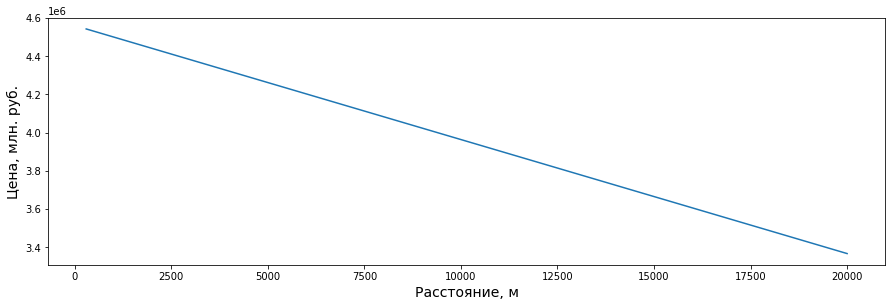

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(dists, new_prices)
plt.xlabel("Расстояние, м", size=14)
plt.ylabel("Цена, млн. руб.", size=14)
plt.show()

In [39]:
(max(new_prices) - min(new_prices))/(max(dists) - min(dists))

tensor([[59.6833]])

In [93]:
far_apartment = None
for (X, y) in train_set:
    if 12000 > X[-1] > 11000:
        far_apartment = (X, y)

In [94]:
for idx, feature in enumerate(far_apartment[0]):
    print(headers[idx] + ": " + str(feature.item()))

Число комнат: 3.0
Площадь: 58.099998474121094
Число этажей: 9.0
Этаж квартиры: 8.0
Год постройки: 1983.0
Число лифтов: 1.0
Наличие консьержа: 0.0
Наличие мусоропровода: 1.0
Дизайнерский ремонт: 0.0
Евро-ремонт: 1.0
Косметический ремонт: 0.0
Требуется ремонт: 0.0
Несколько ванных комнат: 0.0
Раздельный санузел: 0.0
Совмещенный санузел: 1.0
Балкон: 1.0
Лоджия: 0.0
Нет ни балкона, ни лоджии: 0.0
Блочный дом: 0.0
Деревянный дом: 0.0
Кирпичный дом: 0.0
Монолитный дом: 0.0
Панельный дом: 1.0
Дзержинский район: 0.0
Индустриальный район: 0.0
Кировский район: 0.0
Ленинский район: 0.0
Мотовилихинский район: 0.0
Орджоникидзевский район: 1.0
Свердловский район: 0.0
Широта: 58.109718322753906
Долгота: 56.28522491455078
Число образовательных учреждений: 3.0
Число заведений здоровья: 3.0
Число заведений культуры: 2.0
Число заведений общепита: 11.0
Расстояние до центра: 11518.4296875


In [95]:
start_distance = 11500
end_distance = 100
dists = np.linspace(start_distance, end_distance, 200)
new_prices = []
dists[:10]

array([11500.        , 11442.71356784, 11385.42713568, 11328.14070352,
       11270.85427136, 11213.5678392 , 11156.28140704, 11098.99497487,
       11041.70854271, 10984.42211055])

In [96]:
model.eval()
with torch.no_grad():
    for distance in dists:
        data = far_apartment[0].clone().detach().requires_grad_(False)
        data[-1] = torch.tensor(distance, dtype=torch.float32)
        y_pred = model(data.reshape(1, -1))
        new_prices.append(y_pred)

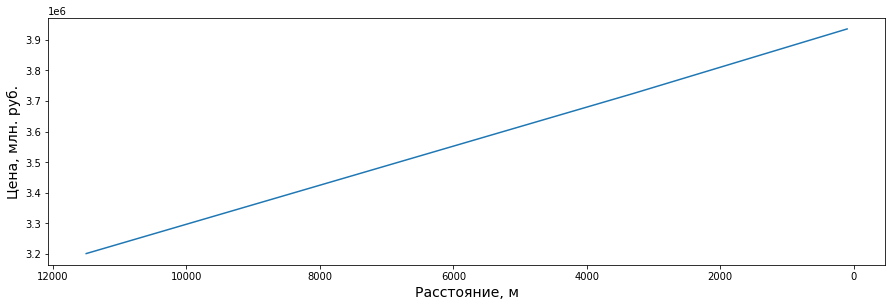

In [97]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(dists, new_prices)
plt.xlabel("Расстояние, м", size=14)
plt.ylabel("Цена, млн. руб.", size=14)
plt.gca().invert_xaxis()
plt.show()

In [98]:
(max(new_prices) - min(new_prices))/(max(dists) - min(dists))

tensor([[64.4166]])

## Влияние инфраструктуры

### Образование

In [136]:
mean_infro_apartment = None
for (X, y) in train_set:
     if 10 < X[-2] < 280 and 0 < X[-3] < 300 and 0 < X[-4] < 300 and 0 < X[-5] < 300:
        mean_infro_apartment = (X, y)

In [137]:
mean_infro_apartment

(tensor([3.0000e+00, 4.2500e+01, 5.0000e+00, 5.0000e+00, 1.9650e+03, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         5.7977e+01, 5.6182e+01, 1.9000e+01, 2.7000e+01, 1.0000e+01, 2.0200e+02,
         4.7047e+03]),
 tensor(2840000.))

In [149]:
for idx, feature in enumerate(mean_infro_apartment[0]):
    print(headers[idx] + ": " + str(feature.item()))
print("Цена: " + str(mean_infro_apartment[1].item()))

Число комнат: 3.0
Площадь: 42.5
Число этажей: 5.0
Этаж квартиры: 5.0
Год постройки: 1965.0
Число лифтов: 0.0
Наличие консьержа: 0.0
Наличие мусоропровода: 0.0
Дизайнерский ремонт: 0.0
Евро-ремонт: 0.0
Косметический ремонт: 1.0
Требуется ремонт: 0.0
Несколько ванных комнат: 0.0
Раздельный санузел: 0.0
Совмещенный санузел: 1.0
Балкон: 1.0
Лоджия: 0.0
Нет ни балкона, ни лоджии: 0.0
Блочный дом: 0.0
Деревянный дом: 0.0
Кирпичный дом: 1.0
Монолитный дом: 0.0
Панельный дом: 0.0
Дзержинский район: 0.0
Индустриальный район: 1.0
Кировский район: 0.0
Ленинский район: 0.0
Мотовилихинский район: 0.0
Орджоникидзевский район: 0.0
Свердловский район: 0.0
Широта: 57.97660446166992
Долгота: 56.181583404541016
Число образовательных учреждений: 19.0
Число заведений здоровья: 27.0
Число заведений культуры: 10.0
Число заведений общепита: 202.0
Расстояние до центра: 4704.7001953125
Цена: 2840000.0


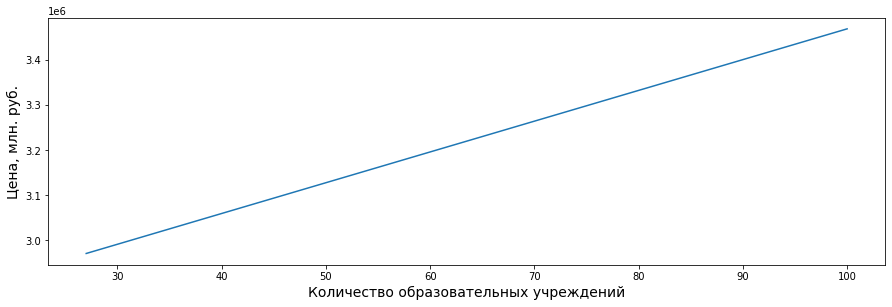

In [139]:
start_value = 27
end_value = 100
values = np.linspace(start_value, end_value, 20)
new_prices = []

model.eval()
with torch.no_grad():
    for value in values:
        data = mean_infro_apartment[0].clone().detach().requires_grad_(False)
        data[-5] = torch.tensor(value, dtype=torch.float32)
        y_pred = model(data.reshape(1, -1))
        new_prices.append(y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(values, new_prices)
plt.xlabel("Количество образовательных учреждений", size=14)
plt.ylabel("Цена, млн. руб.", size=14)
plt.show()

In [140]:
(max(new_prices) - min(new_prices))/(max(values) - min(values))

tensor([[6812.6919]])

### Еда

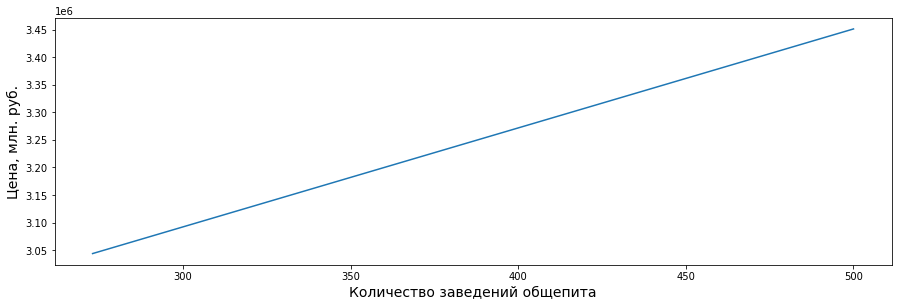

In [141]:
start_value = 273
end_value = 500
values = np.linspace(start_value, end_value, 20)
new_prices = []

model.eval()
with torch.no_grad():
    for value in values:
        data = mean_infro_apartment[0].clone().detach().requires_grad_(False)
        data[-2] = torch.tensor(value, dtype=torch.float32)
        y_pred = model(data.reshape(1, -1))
        new_prices.append(y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(values, new_prices)
plt.xlabel("Количество заведений общепита", size=14)
plt.ylabel("Цена, млн. руб.", size=14)
plt.show()

In [142]:
(max(new_prices) - min(new_prices))/(max(values) - min(values))

tensor([[1795.8678]])

### Культура

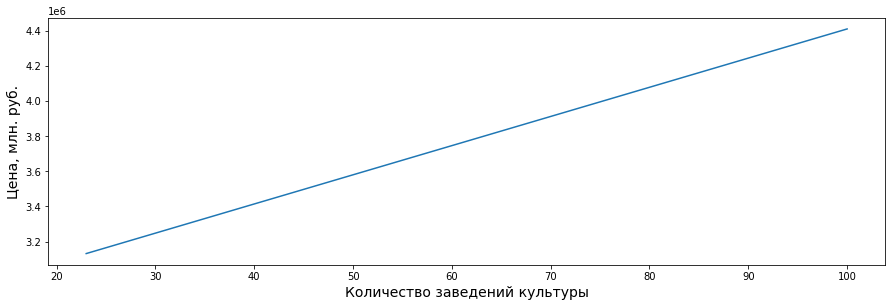

In [143]:
start_value = 23
end_value = 100
values = np.linspace(start_value, end_value, 20)
new_prices = []

model.eval()
with torch.no_grad():
    for value in values:
        data = mean_infro_apartment[0].clone().detach().requires_grad_(False)
        data[-3] = torch.tensor(value, dtype=torch.float32)
        y_pred = model(data.reshape(1, -1))
        new_prices.append(y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(values, new_prices)
plt.xlabel("Количество заведений культуры", size=14)
plt.ylabel("Цена, млн. руб.", size=14)
plt.show()

In [144]:
(max(new_prices) - min(new_prices))/(max(values) - min(values))

tensor([[16593.8027]])

### Здоровье

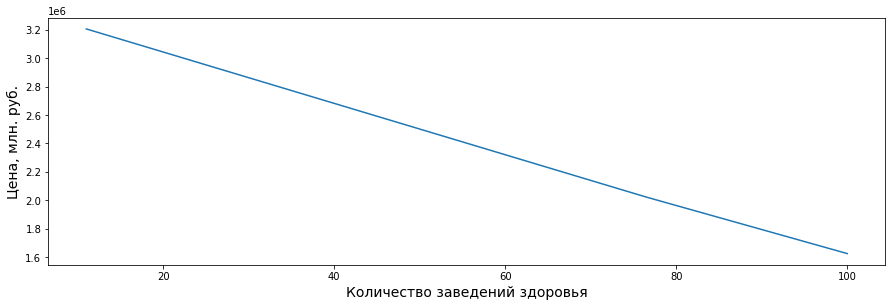

In [145]:
start_value = 11
end_value = 100
values = np.linspace(start_value, end_value, 20)
new_prices = []

model.eval()
with torch.no_grad():
    for value in values:
        data = mean_infro_apartment[0].clone().detach().requires_grad_(False)
        data[-4] = torch.tensor(value, dtype=torch.float32)
        y_pred = model(data.reshape(1, -1))
        new_prices.append(y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(values, new_prices)
plt.xlabel("Количество заведений здоровья", size=14)
plt.ylabel("Цена, млн. руб.", size=14)
plt.show()

In [146]:
(max(new_prices) - min(new_prices))/(max(values) - min(values))

tensor([[17732.1230]])

### Одновременное изменение

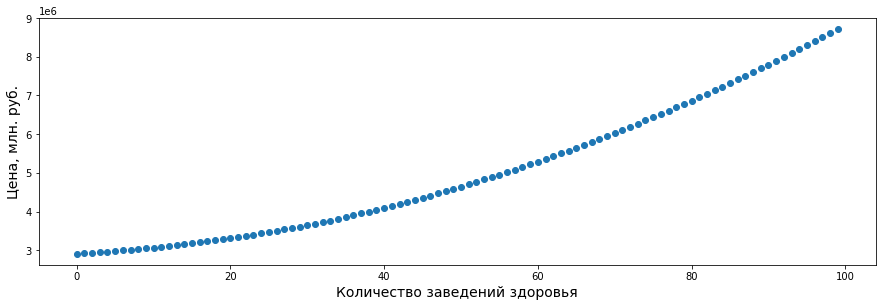

In [166]:
# Число образовательных учреждений: 19.0
# Число заведений здоровья: 27.0
# Число заведений культуры: 10.0
# Число заведений общепита: 202.0

value_dict = dict(edu=19, health=27, culture=10, eat=202)
new_prices = []

model.eval()
with torch.no_grad():
    for i in range(100):
        data = mean_infro_apartment[0].clone().detach().requires_grad_(False)
        data[-5] = torch.tensor(value_dict.get('edu'), dtype=torch.float32)
        data[-4] = torch.tensor(value_dict.get('health'), dtype=torch.float32)
        data[-3] = torch.tensor(value_dict.get('culture'), dtype=torch.float32)
        data[-2] = torch.tensor(value_dict.get('eat'), dtype=torch.float32)
        y_pred = model(data.reshape(1, -1))
        value_dict['edu'] += 1.5 + 2*i/100
        value_dict['health'] += 0.5 + 5*i/100
        value_dict['culture'] += 0.5 + 10*i/100
        value_dict['eat'] += 1 + i/100
        new_prices.append(y_pred)
        
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.scatter(list(range(len(new_prices))), new_prices)
plt.xlabel("Количество заведений здоровья", size=14)
plt.ylabel("Цена, млн. руб.", size=14)
plt.show()